<a href="https://colab.research.google.com/github/leobioinf0/Hypothesis_testing/blob/main/S08_T01_Test_dhipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test d'hipòtesis**

Course: *Data Science amb Python*

Sprint: *8. Hypothesis Testing*

Task: *S08 T01: Tasca del test d'hipòtesis*

Date: *2021-09-28*

[Leo Madsen](https://github.com/leobioinf0)



In [2]:
# importing libraries
import scipy as sp
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

sns.set(style="darkgrid",
        rc={'figure.figsize':(12,7)})

warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/v2evalsdcjmjae7qa3znimu24fxffi')
# change column names from abbreviations to full names to help with domain knowledge
df = df.rename(columns={'G': 'Games_Played', 'AB': 'At_bats', 'R': 'Runs', 'H': 'Hits',
                   '2B': 'Doubles', '3B': 'Triples', 'HR': 'Home_Runs', 'SB': 'Stolen_Base',
                   'BB': 'Walk', 'SO': 'Strikeouts', 'IBB': 'Intentional_Walk', 'HBP': 'Hit_By_Pitch',
                   'SH': 'Sacrifice_Bunt', 'SF': 'Sacrifice_Fly', 'PA': 'Plate_Appearance'})
df.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,...,RBI,Stolen_Base,Walk,Strikeouts,salary,Intentional_Walk,Hit_By_Pitch,Sacrifice_Bunt,Sacrifice_Fly,Plate_Appearance
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,...,0,0,0,0,300000,0,0,0,0,0
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,...,0,0,0,0,387500,0,0,0,0,0
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,...,0,0,0,1,403250,0,0,0,0,1
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,...,0,0,0,0,419000,0,0,0,0,0
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,...,0,0,0,0,500000,0,0,0,0,0


## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
!pip install fitter

Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

- $H_0 = $ the sample has a Gaussian distribution
- $H_1 = $ the sample does not have a Gaussian distribution.

In [151]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
sample =  df['height'].sample(frac=.1, random_state=1)
# normality test
stat, p = shapiro(sample)
print("Test-Statistic = %.3f , p-value = %.3f"%(stat,p))
# interpret
alpha = 0.05
print("With a confidence level of {}%".format((1-alpha)*100))
if p > alpha:
	print('Sample come from a Gaussian distribution (fail to reject H0)')
else:
	print('Sample does not come from a Gaussian distribution (reject H0)')

Test-Statistic = 0.983 , p-value = 0.000
With a confidence level of 95.0%
Sample does not come from a Gaussian distribution (reject H0)


,sumsquare_error,aic,bic,kl_div
dgamma,3.475087,799.624788,-18936.281651,inf
dweibull,3.488018,819.374695,-18925.774948,inf
burr12,3.528214,783.324902,-18885.412094,inf
loggamma,3.528666,837.310791,-18892.997073,inf
vonmises_line,3.529142,824.221414,-18892.616011,inf


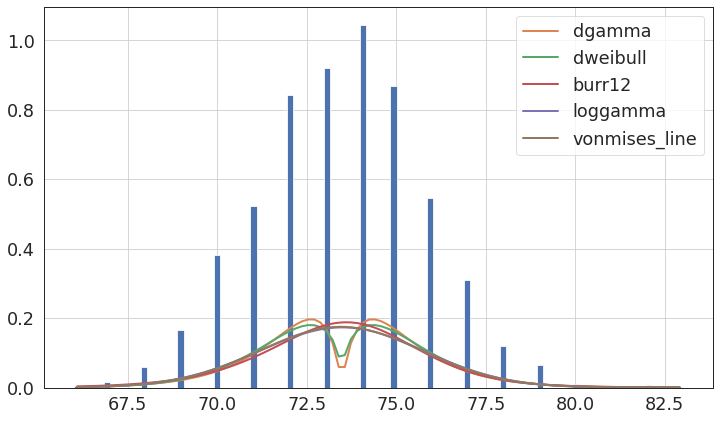

In [155]:
from fitter import Fitter
sample_fitter = Fitter(sample,
           distributions=get_distributions())
sample_fitter.fit()
sample_fitter.summary()

We see that the sample best fit to a double gamma continuous random distribution.

In [158]:
sample_fitter.get_best()

{'dgamma': {'a': 1.8557303224539234,
  'loc': 73.48028928647835,
  'scale': 0.9977419776471326}}

## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Tests whether two samples ('height', 'weight') have a linear relationship.

- $H_0 = $ the two samples are independent.
- $H_1 = $ there is a dependency between the samples.


In [84]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
sample = df[['height','weight']].sample(frac=.1, random_state=1)
stat, p = pearsonr(sample['height'], sample['weight'])

print("Pearson’s correlation coefficient: = %.3f , p-value = %.3f"%(stat,p))
# interpret
alpha = 0.05
print("With a confidence level of {}%".format((1-alpha)*100))

if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.533, p=0.000
Probably dependent


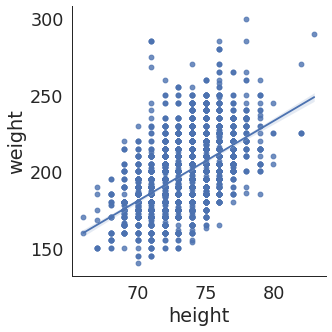

In [85]:
sns.lmplot(x= 'height', y= 'weight', data=sample)

## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


We want to know if four different 32 seasons (from 1985 to 2016) lead to different mean salary to each Leage. 
We will use a repeated measures ANOVA to determine if the mean salary differs between seasons.

- The null hypothesis (H0): µ1 = µ2 = µ3 (the population means are all equal)
- The alternative hypothesis: (H1): at least one population mean is different from the rest

In [140]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
Anova_rm= AnovaRM(data=df, depvar='salary', subject='League', within=['Season'], aggregate_func="mean").fit()

In [142]:
print(Anova_rm)

                Anova
       F Value   Num DF  Den DF Pr > F
--------------------------------------
Season 156.0604 31.0000 31.0000 0.0000



The F test-statistic is 156.06 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in mean salary between the seasons.

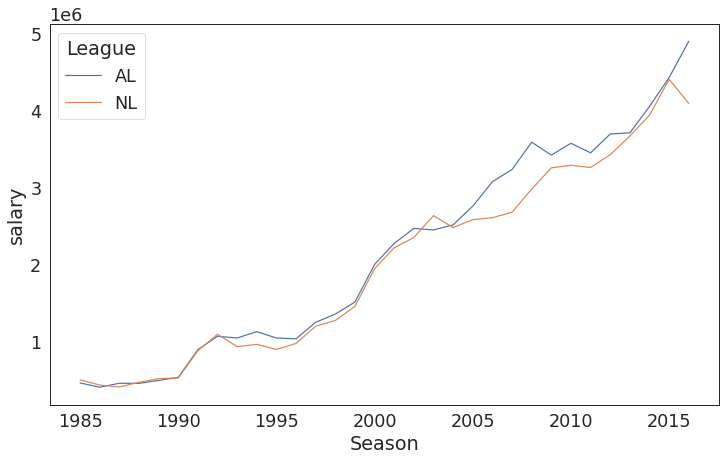

In [148]:
Df = df.groupby(["League","Season"]).mean()["salary"].reset_index()
sns.lineplot(x="Season", y="salary", hue="League", data=Df)